In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir(r"C:\Users\JAYANT\Desktop\python_240624\Finger_tips_project\Project6_titanic_survival")

In [2]:
pwd

'C:\\Users\\JAYANT\\Desktop\\python_240624\\Finger_tips_project\\Project6_titanic_survival'

In [3]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.float_format", lambda x: "% .3f"%x)

In [4]:
data=pd.read_csv(r"ML Project - Logistic Regression Titanic Survival U16955478860.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
(data.isnull().sum()/len(data))*100

PassengerId     0.000
Survived        0.000
Pclass          0.000
Name            0.000
Sex             0.000
Age            19.865
SibSp           0.000
Parch           0.000
Ticket          0.000
Fare            0.000
Cabin          77.104
Embarked        0.224
dtype: float64

In [7]:
num_col=data.select_dtypes(exclude="object")
cat_col=data.select_dtypes(include="object")

In [24]:
num_col

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.000,1,0,7.250
1,2,1,1,38.000,1,0,71.283
2,3,1,3,26.000,0,0,7.925
3,4,1,1,35.000,1,0,53.100
4,5,0,3,35.000,0,0,8.050
...,...,...,...,...,...,...,...
886,887,0,2,27.000,0,0,13.000
887,888,1,1,19.000,0,0,30.000
888,889,0,3,NaN,1,2,23.450
889,890,1,1,26.000,0,0,30.000


In [24]:
(num_col.isnull().sum()/len(num_col))*100

PassengerId    0.000
Survived       0.000
Pclass         0.000
Age            0.000
SibSp          0.000
Parch          0.000
Fare           0.000
dtype: float64

In [9]:
from sklearn.impute import KNNImputer

In [10]:
## for KNN imputer , it is must to retain column names as below, remember this
model=KNNImputer(n_neighbors=3)

num_col=pd.DataFrame(model.fit_transform(num_col),columns=num_col.columns)

In [11]:
num_col.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [15]:
(cat_col.isnull().sum()/len(cat_col))*100

Name         0.000
Sex          0.000
Ticket       0.000
Cabin       77.104
Embarked     0.224
dtype: float64

### KNN imputer is not working for cat_cols
model=KNNImputer(n_neighbors=3)

cat_col=pd.DataFrame(model.fit_transform(cat_col),columns=cat_col.columns)

In [13]:
cat_col.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [16]:
cat_col["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [20]:
cat_col["Cabin"]=cat_col["Cabin"].fillna("No_info")
cat_col.drop("Cabin",axis=1,inplace=True)

cat_col["Cabin"]=cat_col["Cabin"].fillna(cat_col["Cabin"].mode())

In [21]:
cat_col["Embarked"]=cat_col["Embarked"].dropna()

In [28]:
cat_col.columns

Index(['Sex', 'Embarked'], dtype='object')

In [25]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [27]:
cat_col=cat_col.drop(["Name","Ticket"],axis=1)

In [31]:
cat_col=cat_col.apply(enc.fit_transform)

cat_col["Sex"]=enc.fit_transform(cat_col["Sex"])
#cat_col["Cabin"]=enc.fit_transform(cat_col["Cabin"])
cat_col["Embarked"]=enc.fit_transform(cat_col["Embarked"])

In [32]:
cat_col.dtypes

Sex         int32
Embarked    int32
dtype: object

In [33]:

data=pd.concat((num_col,cat_col),axis=1)

In [34]:
data=data.dropna()

In [35]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex            0
Embarked       0
dtype: int64

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    float64
 5   Parch        891 non-null    float64
 6   Fare         891 non-null    float64
 7   Sex          891 non-null    int32  
 8   Embarked     891 non-null    int32  
dtypes: float64(7), int32(2)
memory usage: 55.8 KB


In [37]:
x=data.drop("Survived",axis=1)
y=data["Survived"]

In [39]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score,RandomizedSearchCV

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [41]:
x_train.shape

(712, 8)

In [42]:
from sklearn.linear_model import LogisticRegression

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [65]:
lis=[LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,KNeighborsClassifier,GaussianNB]
from sklearn.metrics import roc_curve,roc_auc_score

In [67]:
for model_class in lis:
    model=model_class()
    name=model_class.__name__
    print(name)
    
    model.fit(x_train,y_train)
    
    y_pred=model.predict(x_test)
    y_pred_proba=model.predict_proba(x_test)[::,1]
    
    train_acc=model.score(x_train,y_train)
    print(f"Train_accuracy:--->{train_acc}")
    
    test_acc=model.score(x_test,y_test)
    print(f"Test_accuracy:--->{test_acc}")
    
    fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
    auc=roc_auc_score(y_test,y_pred_proba)
    print(f"Auc score:--->{auc}")
    print("\n")

LogisticRegression
Train_accuracy:--->0.7949438202247191
Test_accuracy:--->0.7821229050279329
Auc score:--->0.8346203346203346


DecisionTreeClassifier
Train_accuracy:--->1.0
Test_accuracy:--->0.7039106145251397
Auc score:--->0.6997425997425997


RandomForestClassifier
Train_accuracy:--->1.0
Test_accuracy:--->0.8100558659217877
Auc score:--->0.8877091377091377


GradientBoostingClassifier
Train_accuracy:--->0.9030898876404494
Test_accuracy:--->0.8212290502793296
Auc score:--->0.8652509652509653


KNeighborsClassifier
Train_accuracy:--->0.7443820224719101
Test_accuracy:--->0.6759776536312849
Auc score:--->0.6521235521235521


GaussianNB
Train_accuracy:--->0.7991573033707865
Test_accuracy:--->0.776536312849162
Auc score:--->0.8501930501930501




In [43]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [44]:
model.score(x_train,y_train)

0.7949438202247191

In [45]:
model.score(x_test,y_test)

0.7821229050279329

In [46]:
y_pred=model.predict(x_test)

In [47]:
from sklearn.metrics import recall_score,precision_score,confusion_matrix,classification_report,f1_score

In [48]:
confusion_matrix(y_test,y_pred)

array([[89, 16],
       [23, 51]], dtype=int64)

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82       105
         1.0       0.76      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [50]:
recall_score(y_test,y_pred)

0.6891891891891891

In [51]:
precision_score(y_test,y_pred)

0.7611940298507462

In [52]:
f1_score(y_test,y_pred)

0.7234042553191488

In [53]:
y_prob=model.predict_proba(x_test)

In [54]:
y_prob

array([[0.87243933, 0.12756067],
       [0.82103157, 0.17896843],
       [0.78414245, 0.21585755],
       [0.20675027, 0.79324973],
       [0.44928732, 0.55071268],
       [0.13158653, 0.86841347],
       [0.35273346, 0.64726654],
       [0.88950125, 0.11049875],
       [0.36775774, 0.63224226],
       [0.3772362 , 0.6227638 ],
       [0.79128868, 0.20871132],
       [0.82238527, 0.17761473],
       [0.49371864, 0.50628136],
       [0.8783942 , 0.1216058 ],
       [0.83346126, 0.16653874],
       [0.15184137, 0.84815863],
       [0.70154518, 0.29845482],
       [0.27121831, 0.72878169],
       [0.73303251, 0.26696749],
       [0.77009128, 0.22990872],
       [0.86705949, 0.13294051],
       [0.75556716, 0.24443284],
       [0.42102599, 0.57897401],
       [0.80818104, 0.19181896],
       [0.82269012, 0.17730988],
       [0.90229405, 0.09770595],
       [0.83060447, 0.16939553],
       [0.77691678, 0.22308322],
       [0.95200877, 0.04799123],
       [0.33418186, 0.66581814],
       [0.

In [73]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

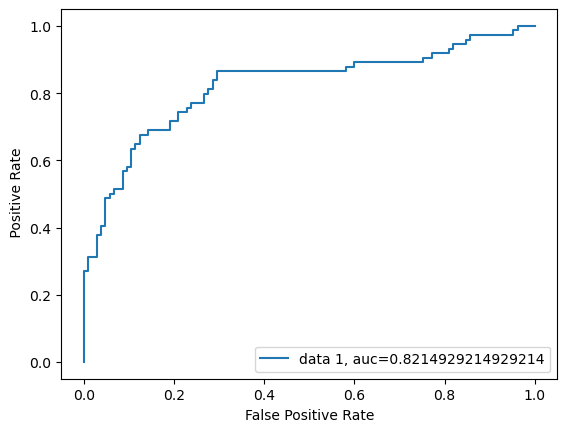

In [74]:
y_pred_proba =model.predict_proba(x_test)[::,1]
fpr, tpr, threshold = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc=" +str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel(" Positive Rate")

plt.show()

1. y_pred_proba = model.predict_proba(x_test)[::,1]
model.predict_proba(X_test): This function predicts the probability of each class for the given test data (X_test). For binary classification problems, it returns a 2D array with two columns:
First column: Probability of the instance being in class 0.
Second column: Probability of the instance being in class 1.
[::,1]: This is used to select the second column from the output, which corresponds to the probability of the positive class (class 1). So y_pred_proba contains the predicted probabilities for the positive class for all the test instances.




2. fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
roc_curve(y_test, y_pred_proba): This function computes the Receiver Operating Characteristic (ROC) curve. It returns:
fpr (False Positive Rate): The rate at which the model incorrectly predicts class 1 (positive class) when it is actually class 0.
tpr (True Positive Rate): Also called sensitivity or recall, this is the rate at which the model correctly predicts class 1 when it is actually class 1.
threshold: The threshold values used to compute fpr and tpr. As the threshold varies, you get different values of fpr and tpr, which are used to plot the ROC curve.



3. auc = roc_auc_score(y_test, y_pred_proba)
roc_auc_score(y_test, y_pred_proba): This function computes the Area Under the ROC Curve (AUC), which is a single scalar value representing the model's ability to discriminate between the positive and negative classes. A perfect classifier would have an AUC of 1, while a model that predicts randomly would have an AUC of 0.5.

The AUC score summarizes the ROC curve into a single number, where higher values indicate a better model performance.

4. plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))
plt.plot(fpr, tpr, label="data 1, auc=" + str(auc)): This line plots the ROC curve. The ROC curve is a plot of the True Positive Rate (tpr) against the False Positive Rate (fpr) at various threshold levels. The label includes the AUC score for reference.





5. plt.legend(loc=4)
plt.legend(loc=4): This adds a legend to the plot, displaying the AUC score. The argument loc=4 places the legend in the lower right corner of the plot.



6. plt.xlabel("False Positive Rate")
plt.xlabel("False Positive Rate"): This sets the x-axis label to "False Positive Rate".



7. plt.ylabel("Positive Rate")
plt.ylabel("Positive Rate"): This sets the y-axis label to "Positive Rate". This should technically be "True Positive Rate" or "Recall" for better clarity.



8. plt.show()
plt.show(): This displays the ROC curve plot.





Summary of the Code's Purpose:
The code first generates the predicted probabilities of the positive class for the test set.
Then, it calculates the false positive rate (FPR) and true positive rate (TPR) at various thresholds using the ROC curve.
It computes the AUC score to measure the model's performance.
Finally, it plots the ROC curve and shows the AUC score on the plot.
The ROC curve is a great way to visualize how well the classifier is distinguishing between the positive and negative classes across different thresholds.










